In [1]:
import os
import ast
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import tensorflow as tf
import pickle
# from tensorflow.contrib import lite
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer
from keras.utils import to_categorical, plot_model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l1, l2, l1_l2
from keras.utils import np_utils
from keras.models import load_model
from keras import backend as K
import random
from random import randrange

# %matplotlib notebook

c:\users\cesar\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\cesar\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\cesar\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\cesar\appd

In [16]:
def indices_to_one_hot(letra, nb_classes):
    # Gera um dicionário de mapeamento de letra em valor inteiro (a->0, b->1, ..., w->20)
    dic_conv = {}
    for i,letra in enumerate(letras):
        dic_conv[letra] = i
    
    num = dic_conv[letra]
    return [[0 if i!=num else 1 for i in range(nb_classes)]]


def get_incorrects(model, data, labels):
    p = model.predict(data)
    
    errors = []
    for i in range(len(data)):
        equal = (np.where(labels[i] == np.amax(labels[i]))[0][0]) == (np.where(p[i] == np.amax(p[i])))[0][0]
        if not equal:
            print((np.where(labels[i] == np.amax(labels[i]))[0][0]), (np.where(p[i] == np.amax(p[i])))[0][0])
            print()
            errors.append(i)
        
    print(len(errors))
    return errors


def test_file(model, file_name):
    letra = file_name[0].lower()
    dataset_test = pd.DataFrame()

    with open(file_name) as file:
        lines_test = [l.strip() for l in file]
        lines_test = ast.literal_eval(lines_test[0])
        temp = pd.DataFrame(lines_test)
        temp['label'] = 'c'
        dataset_test = dataset_test.append(temp, ignore_index = True)

    X_DT = dataset_test.iloc[:,0:30] # [all rows, col from index 2 to the last one excludind 'label']
    X_DT = X_DT/32768

    # Tranform training labels to one-hot encoding
    y_DT = indices_to_one_hot(letra,20)

    y_DT = y_DT*100
    
    errors = get_incorrects(model, X_DT, y_DT)
    return errors


def print_acc_results(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
#     plt.title('Resultados no treinamento')
    plt.ylabel('Acurácia')
    plt.xlabel('Época')
    plt.legend(['Treinamento', 'Teste'], loc='best')
    plt.grid()
#     plt.ylim((0, 1)) 
    plt.show()


def print_loss_results(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
#     plt.title('Resultados no teste')
    plt.ylabel('Entropia Cruzada')
    plt.xlabel('Época')
    plt.legend(['Treinamento', 'Teste'], loc='best')
    plt.grid()
#     plt.ylim((0, 10)) 
    plt.show()

In [6]:
X_train = pd.read_csv("mini_dataset_train.csv")
X_val = pd.read_csv('mini_dataset_validation.csv')

X_train = X_train.iloc[:,1:31]
X_val = X_val.iloc[:,1:31]

y_train = np.loadtxt("labels_train.csv", delimiter=",")
y_val = np.loadtxt("labels_validation.csv", delimiter=",")

In [15]:
for neurons in range(1,51):

    model = Sequential()

    classes = 20
    # hidden_layers = 0
    # neurons = [25] * hidden_layers
    # neurons = 1
    epochs = 10000

    # Camada de entrada
    model.add(Dense(units=neurons, activation='sigmoid', input_dim=30))

    # model.add(Dropout(0.2))
    # Camadas escondidas
    # for i in range(hidden_layers):
    #     model.add(Dense(units=neurons[i], activation='sigmoid'))

    # Camada de saída\
    model.add(Dense(units=classes, activation='softmax'))

    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=epochs, batch_size = 20, validation_data=(X_val, y_val), verbose=0)
    loss, accuracy = model.evaluate(X_val, y_val)

    with open('variacao_neuronios/' + str(neurons) + '_neurons.pickle', 'wb') as handle:
        pickle.dump(history, handle, protocol=pickle.HIGHEST_PROTOCOL)

    # model.save('modelo_alfabeto_treinado.h5')





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

40/40 [==============================] - 0s 75us/step


In [ ]:
legend = []
for i in range(45,51):
    with open('variacao_neuronios/'+str(i)+'_neurons.pickle', 'rb') as handle:
        history = pickle.load(handle)
        
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    legend = legend + ['Treinamento ' + str(i), 'Teste '+ str(i)]
    
plt.legend(legend, loc='best')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.grid()
plt.rcParams['figure.figsize'] = [100, 50]
plt.show()

In [28]:
with open('variacao_neuronios/10_neurons.pickle', 'rb') as handle:
    history = pickle.load(handle)

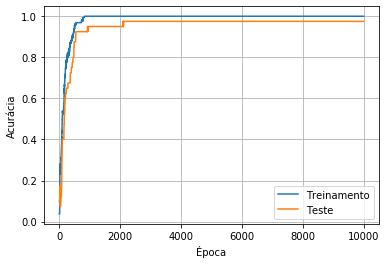

In [29]:
print_acc_results(history)

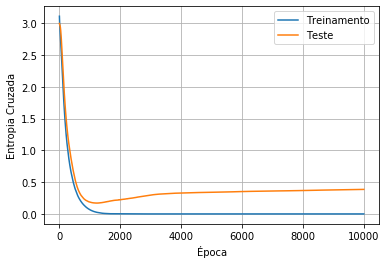

In [30]:
print_loss_results(history)